<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
store_sales = pd.read_csv("/content/train.csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [3]:
#check for null
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [4]:
#drop store and item col
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [5]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [6]:
#convert date to dateTime datatype
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [7]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 13.9 MB


In [8]:
#convert date to month period and then sum the number of items in each month
store_sales['date']= store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').agg({'sales':'sum'}).reset_index()

In [9]:
#convert the resulting date to timestamp datatype
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [10]:
monthly_sales.head(10)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


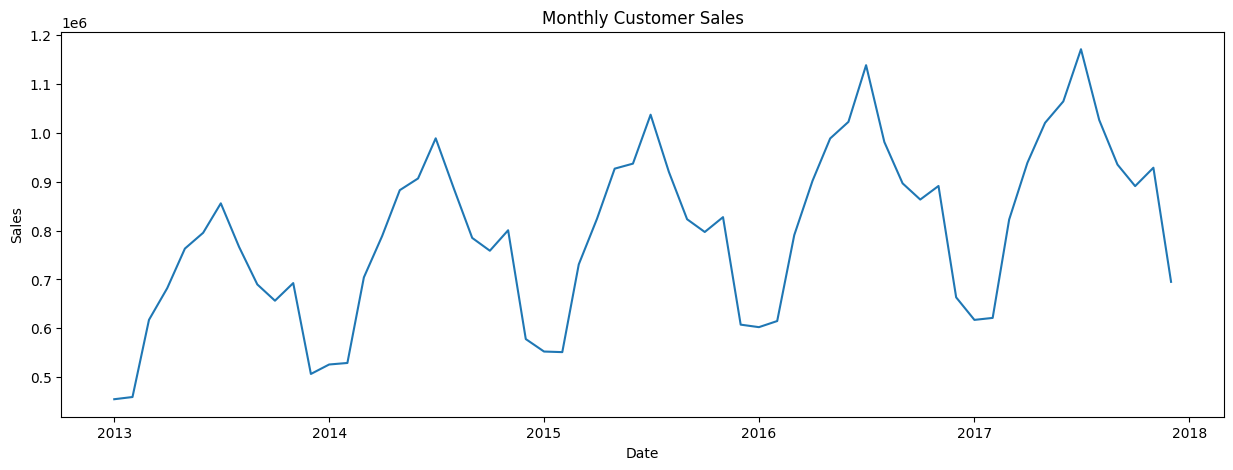

In [11]:
#visualization
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

In [12]:
#call the difference on the sale col to make the sales data stationary
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


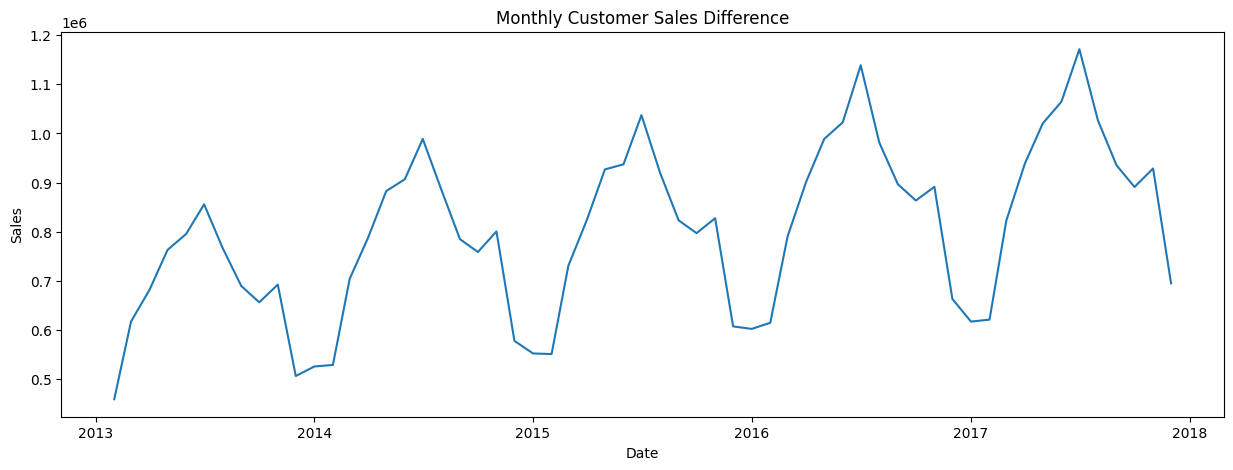

In [13]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales Difference")
plt.show()

In [14]:
#dropping off sales and date
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)

In [15]:
#preparing the supervised data
for i in range(1,13):
  col_name ='month_'+str(i)
  supervised_data[col_name]=supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [16]:
supervised_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales_diff  47 non-null     float64
 1   month_1     47 non-null     float64
 2   month_2     47 non-null     float64
 3   month_3     47 non-null     float64
 4   month_4     47 non-null     float64
 5   month_5     47 non-null     float64
 6   month_6     47 non-null     float64
 7   month_7     47 non-null     float64
 8   month_8     47 non-null     float64
 9   month_9     47 non-null     float64
 10  month_10    47 non-null     float64
 11  month_11    47 non-null     float64
 12  month_12    47 non-null     float64
dtypes: float64(13)
memory usage: 4.9 KB


In [17]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]

In [18]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (35, 13)
Test Data Shape:  (12, 13)


In [19]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [20]:
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [21]:
x_train, y_train = train_data[:,1:], train_data[:,0:1]
x_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("x_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)

x_train Shape:  (35, 12)
y_train Shape:  (35,)
x_test Shape:  (12, 12)
y_test Shape:  (12,)


In [22]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [23]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [24]:
#to create the linear regression model and the prediction
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [25]:
y_pred = y_pred.reshape(-1,1)
#This is a set matrix - contains the input features of the test data and also the predicted output
y_pre_test_set = np.concatenate([y_pred, x_test], axis=1)
y_pre_test_set = scaler.inverse_transform(y_pre_test_set)

In [26]:
result_list=[]
for index in range(0, len(y_pre_test_set)):
  result_list.append(y_pre_test_set[index][0]+act_sales[index])
y_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(y_pre_series, left_index=True, right_index=True)

In [27]:
y_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
y_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
y_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("MSE: ", y_mse)
print("MAE: ", y_mae)
print("R2 Score: ", y_r2)
# print(predict_df)

MSE:  16221.272385416869
MAE:  12433.184266490736
R2 Score:  0.9906152516380969


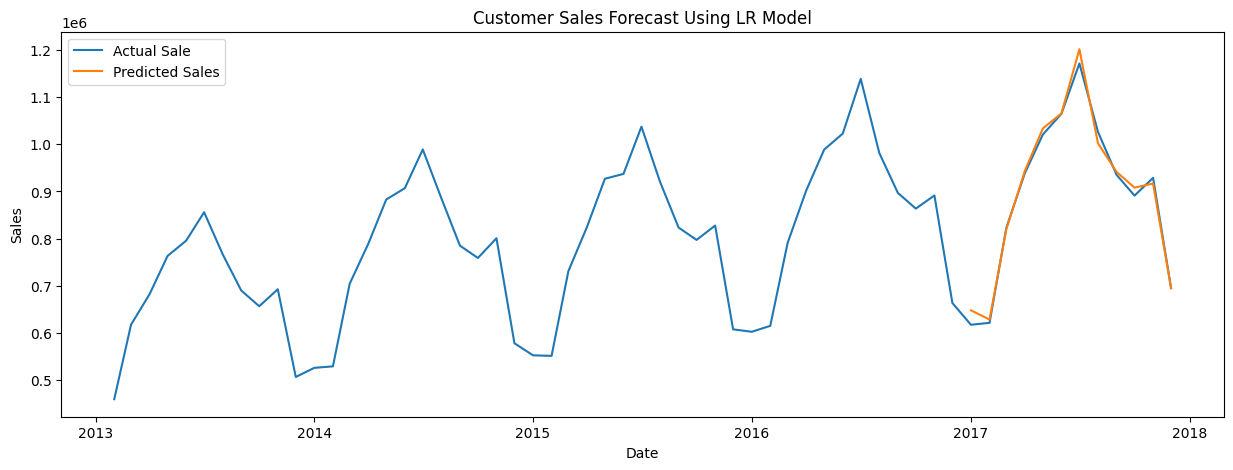

In [28]:
#visualize of the prediction against the actua sales
plt.figure(figsize=(15,5))
#Actual Sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])
#Predicted Sales
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title("Customer Sales Forecast Using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sale','Predicted Sales'])
plt.show()